<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/PeterTKovacs_lab5/Lab5/PeterTKovacs_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 5: integration**


**Péter Kovács**

# **Abstract**

In this lab assignment, we implement some basic quadrature rules for numerical integration.

We experiment with Gauss and Monte Carlo quadratures on reference 1D and 2D elements. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2022 Péter Kovács (ptkovacs@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [2]:
# Load neccessary modules.
from google.colab import files
import numpy as np
from scipy import integrate
import random


# **Introduction**

Approximation integrals is a very important task in numerical analysis, enough to think of the FEM method, where we usually need to integrate arbitrary source terms against basis functions to assemble the linear system we solve at the end.

The idea of approximating integrals as weighted sums of function values sampled at appropriate points is quite a fundamental one, since the very notion of integral is usually introduced as the limit of such sums.

In the case of Gaussian quadrature, we choose our quadrature points in such a way that the approximation of the integral is exact to the highest possible order polynomials. At this point, this startegy is just vaguely defined but this concept is the lead for the in all dimensions, and in fact determines quadrature points and weights.


During coding, we will directly rely on the results presented in chapter 11 of Johan's book, so we won't numerically calculate (Gauss) quadrature weights and points, just use them in the approximating algorithms.

Monte Carlo integration is a way to approximate integrals in higher dimensions or in settings where the integrand 'misbehaves'. It rests on the observation that if we randomize on the integration domain uniformly by some X random variable, then E(f(X)) is precisely the integral we want to approximate. (We just need to make sure that the measure by which we integrate is the probability measure by which we randomize - we may need to readjust by the measure of the domain: see problem 4) 




##**Code**

### 1) 2-point Gauss quadrature on [0,1]

Note that deriving weights and points is in the problem assignment, so we just use them:

$x_0 = \frac{1+\sqrt{3}}{2 \sqrt{3}}$

$x_1= \frac{-1+\sqrt{3}}{2 \sqrt{3}}$

$w_0 = w_1 = 1/2$

In [3]:
def gauss_2_point(f):
  """
  Implementing 2-point Gaussian quadrature on the [0,1] interval

  argument: f function (callable)
  returns: approximation of the integral
  
  """

  w=0.5
  x0=0.5+1/np.sqrt(3)/2
  x1=0.5-1/np.sqrt(3)/2

  return w*(f(x0)+f(x1))

### 2) 3 edge midpoint rule on reference triangle

Following example 11.5, we apply this quadrature rule on a reference triangle (vertices: (0,0), (0,1), (1,0))

The quadrature weights are all 1/6

In [4]:
def gauss_3_point_triangle(f):
  """
  Implementing 3-point Gaussian quadrature on the (0,0), (0,1), (1,0) reference triangle

  argument: f function (callable)
  returns: approximation of the integral
  
  """

  w=1/6
  x0=np.array([0.5,0.5],float)
  x1=np.array([0.,0.5],float)
  x2=np.array([0.5,0.],float)

  return w*(f(x0)+f(x1)+f(x2))

### 3) Monte Carlo quadrature on [0,1]

In this section, no additional comments are needed.



In [5]:
def monte_carlo_1d(f,n):

  '''
  Monte Carlo quadrature of f callable on [0,1], evaluated n times
  '''

  sum=0

  for i in range(n):
    sum+=f(random.random())

  return sum/n

### 4) Monte Carlo quadrature over a refernce triangle

The only nontrivial part is to generate uniform distribution on a triangle. 

We proceed by a nasty trick: we randomize over the unit square and only accept those points that are inside the triangle. Hence we sample from a conditional distribution, but that is uniform as well.



In [6]:
def monte_carlo_2d(f,n,maxiter=1e9):

  '''
  Monte Carlo quadrature of f callable over the unit reference triangle, evaluated n times

  if number of iterations exceeds maxiter (astronomically small probability), return the interim result

  note that since the area of the triangle is not 1 but 1/2, we have to renormalize!
  '''

  sum=0
  points=0
  i=0

  while(i<maxiter):
    x=random.random()
    y=random.random()

    if x+y<=1:
      sum+=f(np.array([x,y],float))
      points+=1
    if points==n:
      return sum/n/2
    
    i+=1

  return sum/points/2

### Testing code

a) test for 2-point Gauss quadrature on [0,1]

Verify against $f(x)=ax^3+bx^2+cx+d$, its integral should be $a/4+b/3+c/2+d$

In [7]:
coeffs=np.random.standard_normal(4)
f = lambda x: np.sum(np.array([coeffs[i]*x**i for i in range(4)],float))

print("exact value: %f\napproximate value: %f" %(np.sum(np.array([coeffs[i]/(i+1) for i in range(4)],float)),gauss_2_point(f)))

exact value: 0.001626
approximate value: 0.001626


b) Monte Carlo quadrature on [0,1]

In [8]:
import matplotlib.pyplot as plt

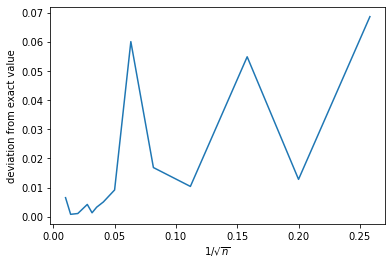

In [9]:
coeffs=np.random.standard_normal(4)
f = lambda x: np.sum(np.array([coeffs[i]*x**i for i in range(4)],float))
n=[15,25,40,80,150,250,400,600,800,1000,1300,2500,5000,10000]

exact=np.sum(np.array([coeffs[i]/(i+1) for i in range(4)],float))

plt.figure()
plt.plot([1/np.sqrt(x) for x in n],[np.abs(exact-monte_carlo_1d(f,x)) for x in n])
plt.xlabel('1/$\sqrt{n}$')
plt.ylabel('deviation from exact value')
plt.show()


c) Gauss on unit triangle

Verify against $f(x)=ax^2+by^2+cxy+dx+ey+f$, its integral should be $a/12+b/12+c/24+d/6+e/6+f/2$



In [10]:
_c=np.random.standard_normal(6)

f=lambda x: _c[0]*x[0]**2+_c[1]*x[1]**2+_c[2]*x[0]*x[1]+_c[3]*x[0]+_c[4]*x[1]+_c[5]

print("exact value: %f\napproximate value: %f" %
      (_c[0]/12+_c[1]/12+_c[2]/24+_c[3]/6+_c[4]/6+_c[5]/2,
       gauss_3_point_triangle(f)))



exact value: -0.677188
approximate value: -0.677188


d) Monte Carlo on triangle

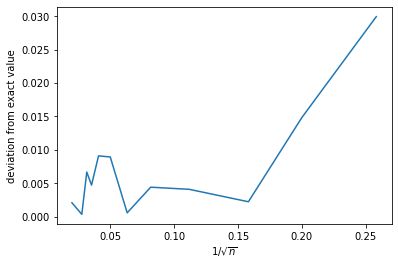

In [11]:
_c=np.random.standard_normal(6)

f=lambda x: _c[0]*x[0]**2+_c[1]*x[1]**2+_c[2]*x[0]*x[1]+_c[3]*x[0]+_c[4]*x[1]+_c[5]
n=[15,25,40,80,150,250,400,600,800,1000,1300,2500]

exact=_c[0]/12+_c[1]/12+_c[2]/24+_c[3]/6+_c[4]/6+_c[5]/2

plt.figure()
plt.plot([1/np.sqrt(x) for x in n],[np.abs(exact-monte_carlo_2d(f,x)) for x in n])
plt.xlabel('1/$\sqrt{n}$')
plt.ylabel('deviation from exact value')
plt.show()


# **Summary, discussion**

Methods work as expected.

In a more genral setting, book-keeping Gauss quadrature may be tedious and even extremely hard for general 'misbehaving' multifimensional domains, whereas Monte Carlo seamlessly generalizes, as long as we can apply the trick I did in problem 4